**Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

**EDA**

In [2]:
df = pd.read_csv('/content/driver_report.csv')
df.head()

,id,driver_id,driver_ssign_id,imei,date_from,date_to,overspeed_accuracy,overspeed_zone,overspeed_road,overspeed_standard,...,os_st_distance,distance_traveled,duration_traveled,engine_idle,harsh_breaking,harsh_cornering,harsh_acceleration,seat_belt,engine_work,type
0,13,24,7F00000118A12701,357544374129480,2025-11-07 03:23:43,2025-11-07 07:17:56,0,0,0,0,...,0.000,44.84,4103,7939,0,0,0,8,12042,0
1,14,24,7F00000118A12701,357544372502167,2025-11-09 08:40:21,2025-11-10 00:00:00,23,0,0,46,...,200.977,287.90,19769,35191,0,0,0,92,54960,0
2,15,24,7F00000118A12701,357544374129480,2025-11-10 04:05:05,2025-11-10 09:02:17,0,0,0,3,...,2.933,81.46,6044,11740,0,0,0,26,17784,0
3,16,24,7F00000118A12701,357544374163562,2025-11-10 10:43:07,2025-11-11 00:00:00,0,0,0,0,...,0.000,0.00,0,43755,0,0,0,0,43755,0
4,17,24,7F00000118A12701,357544372502167,2025-11-11 04:15:02,2025-11-12 00:00:00,15,0,0,9,...,91.030,112.07,7948,10186,0,0,0,20,18134,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34265 entries, 0 to 34264
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  34265 non-null  int64  
 1   driver_id           34265 non-null  int64  
 2   driver_ssign_id     15277 non-null  object 
 3   imei                34265 non-null  int64  
 4   date_from           34265 non-null  object 
 5   date_to             34265 non-null  object 
 6   overspeed_accuracy  34265 non-null  int64  
 7   overspeed_zone      34265 non-null  int64  
 8   overspeed_road      34265 non-null  int64  
 9   overspeed_standard  34265 non-null  int64  
 10  os_acc_distance     34265 non-null  float64
 11  os_zo_distance      34265 non-null  float64
 12  os_ro_distance      34265 non-null  int64  
 13  os_st_distance      34265 non-null  float64
 14  distance_traveled   34265 non-null  float64
 15  duration_traveled   34265 non-null  int64  
 16  engi

In [4]:
df.describe()

,id,driver_id,imei,overspeed_accuracy,overspeed_zone,overspeed_road,overspeed_standard,os_acc_distance,os_zo_distance,os_ro_distance,os_st_distance,distance_traveled,duration_traveled,engine_idle,harsh_breaking,harsh_cornering,harsh_acceleration,seat_belt,engine_work,type
count,34265.000000,34265.000000,3.426500e+04,34265.000000,34265.000000,34265.0,34265.000000,34265.000000,34265.000000,34265.0,34265.000000,34265.000000,34265.000000,34265.000000,34265.000000,34265.000000,34265.000000,34265.000000,34265.000000,34265.0
mean,59690.086181,2574.125347,5.640028e+14,0.361068,1.214534,0.0,10.407471,1.041389,2.715872,0.0,29.638555,85.084141,8309.539764,22923.539997,6.717963,5.527944,11.580038,51.832161,31233.079761,0.0
std,11310.734389,2041.089215,3.099138e+14,4.196413,5.644934,0.0,15.072961,12.060837,14.259655,0.0,51.697128,97.746395,8926.408572,22481.821584,273.380863,131.018678,291.236700,75.211683,27139.381025,0.0
min,13.000000,3.000000,2.159650e+09,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,51518.000000,1007.000000,3.540171e+14,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,1.750000,715.000000,1452.000000,0.000000,0.000000,0.000000,0.000000,3882.000000,0.0
50%,60099.000000,1866.000000,3.596331e+14,0.000000,0.000000,0.0,4.000000,0.000000,0.000000,0.0,6.415000,54.020000,5669.000000,19030.000000,0.000000,0.000000,0.000000,26.000000,29540.000000,0.0
75%,68665.000000,3871.000000,8.646361e+14,0.000000,0.000000,0.0,16.000000,0.000000,0.000000,0.0,38.416000,132.600000,12782.000000,33645.000000,0.000000,0.000000,0.000000,67.000000,47460.000000,0.0
max,77231.000000,7766.000000,8.698670e+14,133.000000,156.000000,0.0,283.000000,399.643000,294.620000,0.0,1907.692000,2044.660000,75183.000000,86400.000000,16148.000000,9247.000000,13478.000000,1093.000000,86400.000000,0.0


In [5]:
df.describe(include='object')

,driver_ssign_id,date_from,date_to
count,15277,34265,34265
unique,718,7703,2430
top,6F0000013390DD01,2025-12-01 00:00:00,2025-12-23 00:00:00
freq,400,869,1815


In [6]:
new_df = df.copy()

In [7]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34265 entries, 0 to 34264
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  34265 non-null  int64  
 1   driver_id           34265 non-null  int64  
 2   driver_ssign_id     15277 non-null  object 
 3   imei                34265 non-null  int64  
 4   date_from           34265 non-null  object 
 5   date_to             34265 non-null  object 
 6   overspeed_accuracy  34265 non-null  int64  
 7   overspeed_zone      34265 non-null  int64  
 8   overspeed_road      34265 non-null  int64  
 9   overspeed_standard  34265 non-null  int64  
 10  os_acc_distance     34265 non-null  float64
 11  os_zo_distance      34265 non-null  float64
 12  os_ro_distance      34265 non-null  int64  
 13  os_st_distance      34265 non-null  float64
 14  distance_traveled   34265 non-null  float64
 15  duration_traveled   34265 non-null  int64  
 16  engi

**Data Notes**



*   Data Cleaning
*   Feature Engneering
*   Data Cleaning After Feature Engneering
*   Data Processing
*   Clustring
*   Driver Segmentation
*   Insights

**Data Cleaning**


1.   Delete Columns That Don't Affect On Featuer Engneering And Clustring
3.   Validation On Data
4.   Covert The Columns That Need to Converting

**1.  Delete Columns That Don't Affect On Featuer Engneering And Clustring**

In [8]:
new_df.drop(columns=['id' ,  'driver_ssign_id' , 'imei' , 'type' ] , axis=1 , inplace = True)

In [9]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34265 entries, 0 to 34264
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   driver_id           34265 non-null  int64  
 1   date_from           34265 non-null  object 
 2   date_to             34265 non-null  object 
 3   overspeed_accuracy  34265 non-null  int64  
 4   overspeed_zone      34265 non-null  int64  
 5   overspeed_road      34265 non-null  int64  
 6   overspeed_standard  34265 non-null  int64  
 7   os_acc_distance     34265 non-null  float64
 8   os_zo_distance      34265 non-null  float64
 9   os_ro_distance      34265 non-null  int64  
 10  os_st_distance      34265 non-null  float64
 11  distance_traveled   34265 non-null  float64
 12  duration_traveled   34265 non-null  int64  
 13  engine_idle         34265 non-null  int64  
 14  harsh_breaking      34265 non-null  int64  
 15  harsh_cornering     34265 non-null  int64  
 16  hars

2.   **Validation On Data**

In [10]:
(new_df['distance_traveled'] < 1).sum() , (new_df['duration_traveled'] <= 1).sum()

(np.int64(8275), np.int64(6693))

In [11]:
new_df = new_df[new_df['distance_traveled'] >= 1]

In [12]:
new_df = new_df[new_df['engine_idle'] != new_df['engine_work']]

**3.   Covert The Columns That Need to Converting**

In [13]:
new_df.dtypes

,0
driver_id,int64
date_from,object
date_to,object
overspeed_accuracy,int64
overspeed_zone,int64
overspeed_road,int64
overspeed_standard,int64
os_acc_distance,float64
os_zo_distance,float64
os_ro_distance,int64


In [14]:
new_df['duration_traveled']  = new_df['duration_traveled']/3600
new_df['engine_idle']  = new_df['engine_idle']/3600
new_df['engine_work']  = new_df['engine_work']/3600

In [15]:
new_df['date_from'] = pd.to_datetime(new_df['date_from'], errors='coerce')
new_df['date_to']   = pd.to_datetime(new_df['date_to'], errors='coerce')


In [16]:
new_df.dtypes

,0
driver_id,int64
date_from,datetime64[ns]
date_to,datetime64[ns]
overspeed_accuracy,int64
overspeed_zone,int64
overspeed_road,int64
overspeed_standard,int64
os_acc_distance,float64
os_zo_distance,float64
os_ro_distance,int64


In [17]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25990 entries, 0 to 34264
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   driver_id           25990 non-null  int64         
 1   date_from           25990 non-null  datetime64[ns]
 2   date_to             25990 non-null  datetime64[ns]
 3   overspeed_accuracy  25990 non-null  int64         
 4   overspeed_zone      25990 non-null  int64         
 5   overspeed_road      25990 non-null  int64         
 6   overspeed_standard  25990 non-null  int64         
 7   os_acc_distance     25990 non-null  float64       
 8   os_zo_distance      25990 non-null  float64       
 9   os_ro_distance      25990 non-null  int64         
 10  os_st_distance      25990 non-null  float64       
 11  distance_traveled   25990 non-null  float64       
 12  duration_traveled   25990 non-null  float64       
 13  engine_idle         25990 non-null  float64       


**Feature Engneering**


1.   Add Total Overspeed
2.   Add Overspeed Distance
3.   Add OverSpeed Ratio
4.   Add Avg Speed
5.   Add Fuel Consumption
6.   Add Idle Ratio And Driving Ratio
7.   Add Total harsh
8.   Add Accelration And Break And Cornering Rates
9.   Add Seat Belt Per 100KM
10.   Add Time



**Add Total Overspeed**

In [18]:
new_df['total_overspeed'] = new_df[['overspeed_accuracy' , 'overspeed_zone' , 'overspeed_road' , 'overspeed_standard']].sum(axis=  1)

**Add Overspeed Distance**

In [19]:
new_df['overspeed_distance'] =new_df[['os_acc_distance' , 'os_zo_distance' , 'os_ro_distance' , 'os_st_distance']].sum(axis=1)

**Add OverSpeed Ratio**

In [20]:
new_df['overspeed_ratio'] = new_df['total_overspeed'] / new_df['distance_traveled']

**Add Avg Speed**

In [21]:
new_df['avg_speed'] = new_df['distance_traveled']  / new_df['duration_traveled']

In [22]:
new_df = new_df[new_df['avg_speed'] <= 250]

**Add Fuel Consumption**

In [23]:
driving_fuel_per_100km = 7
idle_fuel_per_hour = 1.2

new_df['fuel_consumption'] = ((
    new_df['distance_traveled'] * driving_fuel_per_100km/100
) + (
    new_df['engine_idle'] * idle_fuel_per_hour
)
)

**Add Idle Ratio And Driving Ratio**

In [24]:
new_df['idle_ratio'] = (
    new_df['engine_idle'] / new_df['engine_work']
)

**Add Total harsh**

In [25]:
new_df['total_harsh'] = new_df[['harsh_acceleration' , 'harsh_breaking' , 'harsh_cornering']].sum(axis=1)

**Add Accelration And Break And Cornering Rates**

In [26]:
EPS = 1e-9
new_df['break_rate'] = new_df['harsh_breaking'] / (new_df['total_harsh'] + EPS)
new_df['corner_rate'] = new_df['harsh_cornering'] / (new_df['total_harsh'] + EPS)
new_df['accelation_rate'] = new_df['harsh_acceleration'] / (new_df['total_harsh'] + EPS)

**Add Seat Belt Per 100KM**

In [27]:
new_df['seat_belt_per_km'] = new_df['seat_belt'] / 30

**Add Time**

In [28]:
new_df['hour'] = new_df['date_from'].dt.hour
new_df['is_weekend'] = new_df['date_from'].dt.weekday >= 5


**Data Cleaning After Feature Engneering**

1.   Delete Some Columns





In [29]:
new_df.columns

Index(['driver_id', 'date_from', 'date_to', 'overspeed_accuracy',
       'overspeed_zone', 'overspeed_road', 'overspeed_standard',
       'os_acc_distance', 'os_zo_distance', 'os_ro_distance', 'os_st_distance',
       'distance_traveled', 'duration_traveled', 'engine_idle',
       'harsh_breaking', 'harsh_cornering', 'harsh_acceleration', 'seat_belt',
       'engine_work', 'total_overspeed', 'overspeed_distance',
       'overspeed_ratio', 'avg_speed', 'fuel_consumption', 'idle_ratio',
       'total_harsh', 'break_rate', 'corner_rate', 'accelation_rate',
       'seat_belt_per_km', 'hour', 'is_weekend'],
      dtype='object')

**Delete Some Columns**

In [30]:
new_df.drop(columns = [ 'date_from' , 'date_to', 'overspeed_accuracy' ,'overspeed_zone' , 'overspeed_road' ,  'overspeed_standard', 'os_acc_distance' ,'os_zo_distance' , 'os_ro_distance' , 'os_st_distance' , 'harsh_breaking', 'harsh_cornering', 'harsh_acceleration', 'seat_belt' ] , axis = 1 , inplace = True)

In [31]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25951 entries, 0 to 34264
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   driver_id           25951 non-null  int64  
 1   distance_traveled   25951 non-null  float64
 2   duration_traveled   25951 non-null  float64
 3   engine_idle         25951 non-null  float64
 4   engine_work         25951 non-null  float64
 5   total_overspeed     25951 non-null  int64  
 6   overspeed_distance  25951 non-null  float64
 7   overspeed_ratio     25951 non-null  float64
 8   avg_speed           25951 non-null  float64
 9   fuel_consumption    25951 non-null  float64
 10  idle_ratio          25951 non-null  float64
 11  total_harsh         25951 non-null  int64  
 12  break_rate          25951 non-null  float64
 13  corner_rate         25951 non-null  float64
 14  accelation_rate     25951 non-null  float64
 15  seat_belt_per_km    25951 non-null  float64
 16  hour     

**Data Processing**

In [32]:
model_features = [
    # speed
    'avg_speed' ,
    'overspeed_ratio',
    'overspeed_distance',

    # harshing
    'total_harsh',
    'break_rate',
    'corner_rate',
    'accelation_rate',

    # fuel consumption
    'fuel_consumption',

    # engine
    'idle_ratio',

    # saftey
    'seat_belt_per_km',

    # time
     'hour',
]

In [33]:
min_value = new_df[model_features].quantile(0.01)
max_value = new_df[model_features].quantile(0.99)

df_scaled = new_df[model_features].copy()

for col in model_features:
  min  = min_value[col]
  max = max_value[col]

  m_x_range = max - min

  cliped = new_df[col].clip(lower=min, upper=max)
  df_scaled[col] = (cliped - min) / m_x_range


In [34]:
df_scaled.head()

,avg_speed,overspeed_ratio,overspeed_distance,total_harsh,break_rate,corner_rate,accelation_rate,fuel_consumption,idle_ratio,seat_belt_per_km,hour
0,0.449319,0.000000,0.000000,0.0,0.0,0.0,0.0,0.124232,0.676984,0.020356,0.166667
1,0.620727,0.476468,0.922523,0.0,0.0,0.0,0.0,0.730006,0.657500,0.234097,0.444444
2,0.569541,0.073216,0.009964,0.0,0.0,0.0,0.0,0.213141,0.677875,0.066158,0.222222
4,0.598901,0.425744,0.492588,0.0,0.0,0.0,0.0,0.250852,0.576795,0.050891,0.222222
5,0.599245,0.075538,0.052668,0.0,0.0,0.0,0.0,0.678573,0.425401,0.147583,0.111111


In [35]:
df_scaled['driver_id'] = df['driver_id']

In [36]:
driver_df = (df_scaled.groupby('driver_id')[model_features].mean().reset_index())

driver_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2024 entries, 0 to 2023
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   driver_id           2024 non-null   int64  
 1   avg_speed           2024 non-null   float64
 2   overspeed_ratio     2024 non-null   float64
 3   overspeed_distance  2024 non-null   float64
 4   total_harsh         2024 non-null   float64
 5   break_rate          2024 non-null   float64
 6   corner_rate         2024 non-null   float64
 7   accelation_rate     2024 non-null   float64
 8   fuel_consumption    2024 non-null   float64
 9   idle_ratio          2024 non-null   float64
 10  seat_belt_per_km    2024 non-null   float64
 11  hour                2024 non-null   float64
dtypes: float64(11), int64(1)
memory usage: 189.9 KB


In [37]:
driver_df.drop(columns='driver_id' , axis=1 , inplace=True)

**Clustring**


*   Kmeans




In [38]:

pair_features = [
    'distance_traveled',
    'duration_traveled',
    'avg_speed',
    'fuel_consumption',
    'overspeed_ratio',
    'idle_ratio'


]



**Kmeans**

In [39]:
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(driver_df)

KMeans(n_clusters=5, random_state=42)

In [40]:
kmeans.inertia_

252.84262264257393

In [41]:
sse = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state = 42)
    kmeans.fit(driver_df)
    sse.append(kmeans.inertia_)

sse

[474.57553656142204,
 348.6217215655919,
 305.04294740333603,
 275.62447427856455,
 252.84262264257393,
 237.22920529347755,
 225.5393654448275,
 220.09878050126966,
 209.06033340425049,
 201.82926857514062]

<function matplotlib.pyplot.show(close=None, block=None)>

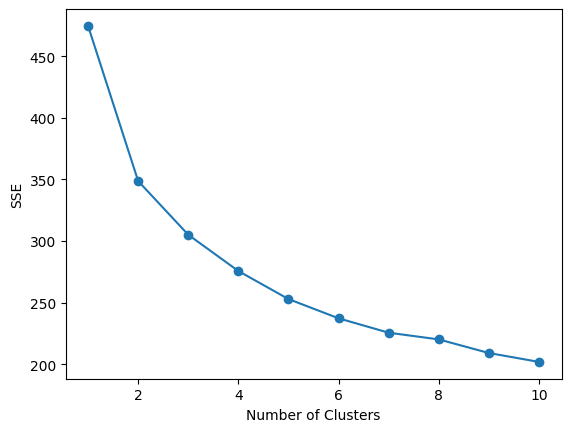

In [42]:
plt.plot(range(1,11), sse , marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.show

In [43]:
final_kmeans = KMeans(n_clusters=4, random_state=42)
final_kmeans.fit_predict(driver_df)
driver_df['KMeans_Clusters'] = final_kmeans.labels_

In [44]:
driver_df['KMeans_Clusters'].unique()

array([2, 1, 0, 3], dtype=int32)

**Driver Segmentation**

In [45]:
driver_df.head()

,avg_speed,overspeed_ratio,overspeed_distance,total_harsh,break_rate,corner_rate,accelation_rate,fuel_consumption,idle_ratio,seat_belt_per_km,hour,KMeans_Clusters
0,0.493335,0.475323,0.363291,0.0,0.0,0.0,0.0,0.368007,0.445096,0.160588,0.259259,2
1,0.599245,0.075538,0.052668,0.0,0.0,0.0,0.0,0.678573,0.425401,0.147583,0.111111,1
2,0.003716,0.000000,0.000000,0.0,0.0,0.0,0.0,0.140336,0.982521,0.005089,0.000000,1
3,0.602177,0.345446,0.404191,0.0,0.0,0.0,0.0,0.387371,0.481793,0.092027,0.296296,2
4,0.381475,0.006131,0.001119,0.0,0.0,0.0,0.0,0.325916,0.604364,0.048770,0.398148,0


In [46]:
cluster_profile = (
    driver_df.groupby('KMeans_Clusters')[model_features].mean().reset_index
)
cluster_profile

<bound method DataFrame.reset_index of                  avg_speed  overspeed_ratio  overspeed_distance  total_harsh  \
KMeans_Clusters                                                                
0                 0.356144         0.198573            0.057987     0.005746   
1                 0.418374         0.218260            0.104033     0.007584   
2                 0.557794         0.340120            0.207655     0.007725   
3                 0.471074         0.342912            0.392412     0.035724   

                 break_rate  corner_rate  accelation_rate  fuel_consumption  \
KMeans_Clusters                                                               
0                  0.006235     0.013285         0.006586          0.216944   
1                  0.008412     0.021570         0.010561          0.414391   
2                  0.012547     0.076812         0.014844          0.260326   
3                  0.042295     0.209971         0.020172          0.666957   

                 idle_ratio  seat_belt_per_km      hour  
KMeans_Clusters                                          
0                  0.653089          0.078560  0.434664  
1                  0.727724          0.139102  0.047237  
2                  0.519042          0.100287  0.457792  
3                  0.642284          0.442402  0.020978  >

In [47]:
segment_map = {
    0: 'Best Drivers',
    1: 'Normal Drivers',
    2: 'Risky Drivers',
    3: 'Worest Drivers'
}

driver_df['driver_profile'] = driver_df['KMeans_Clusters'].map(segment_map)

driver_df.drop(columns='KMeans_Clusters' , axis=1 , inplace=True)

driver_df['driver_id'] = df['driver_id']

driver_df.head()


,avg_speed,overspeed_ratio,overspeed_distance,total_harsh,break_rate,corner_rate,accelation_rate,fuel_consumption,idle_ratio,seat_belt_per_km,hour,driver_profile,driver_id
0,0.493335,0.475323,0.363291,0.0,0.0,0.0,0.0,0.368007,0.445096,0.160588,0.259259,Risky Drivers,24
1,0.599245,0.075538,0.052668,0.0,0.0,0.0,0.0,0.678573,0.425401,0.147583,0.111111,Normal Drivers,24
2,0.003716,0.000000,0.000000,0.0,0.0,0.0,0.0,0.140336,0.982521,0.005089,0.000000,Normal Drivers,24
3,0.602177,0.345446,0.404191,0.0,0.0,0.0,0.0,0.387371,0.481793,0.092027,0.296296,Risky Drivers,24
4,0.381475,0.006131,0.001119,0.0,0.0,0.0,0.0,0.325916,0.604364,0.048770,0.398148,Best Drivers,24


In [48]:
ordered_cols = [
    'driver_id',
    'driver_profile',

    'avg_speed',
    'overspeed_ratio',
    'overspeed_distance',

    'total_harsh',
    'break_rate',
    'corner_rate',
    'accelation_rate',

    'fuel_consumption',
    'idle_ratio',
    'seat_belt_per_km',
    'hour'
]

driver_df = driver_df[ordered_cols]
driver_df.head()

,driver_id,driver_profile,avg_speed,overspeed_ratio,overspeed_distance,total_harsh,break_rate,corner_rate,accelation_rate,fuel_consumption,idle_ratio,seat_belt_per_km,hour
0,24,Risky Drivers,0.493335,0.475323,0.363291,0.0,0.0,0.0,0.0,0.368007,0.445096,0.160588,0.259259
1,24,Normal Drivers,0.599245,0.075538,0.052668,0.0,0.0,0.0,0.0,0.678573,0.425401,0.147583,0.111111
2,24,Normal Drivers,0.003716,0.000000,0.000000,0.0,0.0,0.0,0.0,0.140336,0.982521,0.005089,0.000000
3,24,Risky Drivers,0.602177,0.345446,0.404191,0.0,0.0,0.0,0.0,0.387371,0.481793,0.092027,0.296296
4,24,Best Drivers,0.381475,0.006131,0.001119,0.0,0.0,0.0,0.0,0.325916,0.604364,0.048770,0.398148


**Insights**

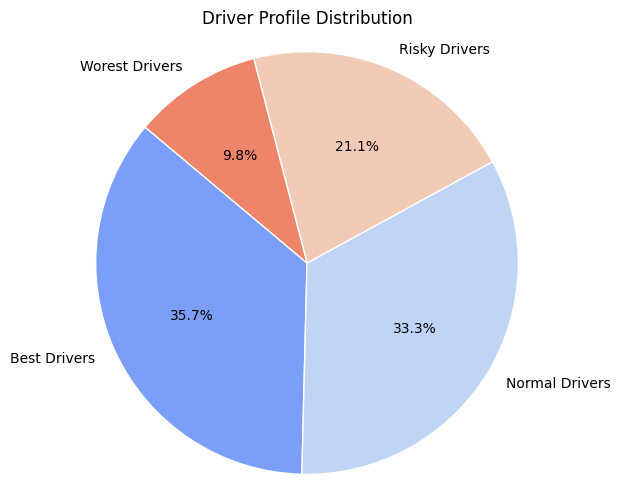

In [49]:
counts = driver_df['driver_profile'].value_counts()

colors = sns.color_palette('coolwarm', len(counts))

plt.figure(figsize=(6,6))
plt.pie(
    counts.values,
    labels=counts.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=colors,
    wedgeprops={'edgecolor': 'white'}
)

plt.title('Driver Profile Distribution')
plt.axis('equal')
plt.show()

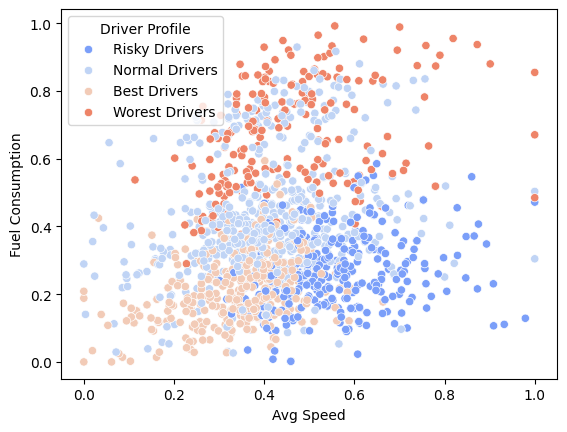

In [50]:
sns.scatterplot(data=driver_df , x = 'avg_speed' , y = 'fuel_consumption' , hue = 'driver_profile' , palette = 'coolwarm')
palette = 'coolwarm'
plt.xlabel('Avg Speed')
plt.ylabel('Fuel Consumption')
plt.legend(title='Driver Profile')
plt.show()

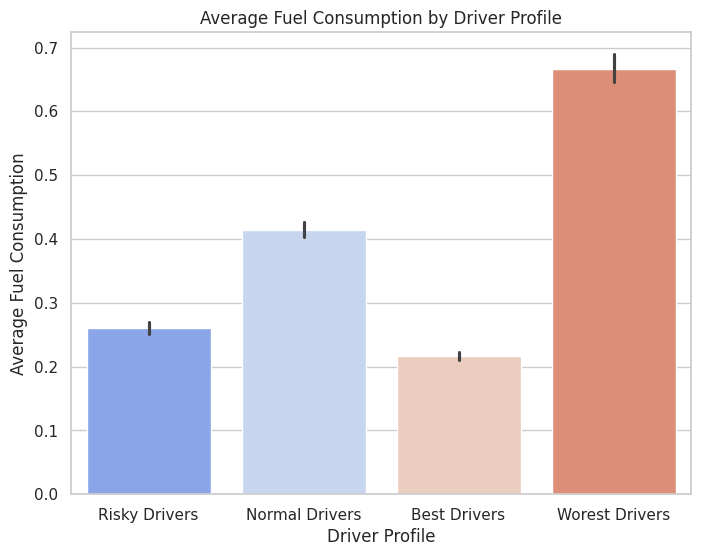

In [51]:


sns.set_theme(style="whitegrid")

plt.figure(figsize=(8, 6))
ax = sns.barplot(
    x='driver_profile',
    y='fuel_consumption',
    data=driver_df,
    estimator='mean',
    hue='driver_profile',
    palette='coolwarm',
    legend=False
)
plt.xlabel('Driver Profile')
plt.ylabel('Average Fuel Consumption')
plt.title('Average Fuel Consumption by Driver Profile')


plt.show()

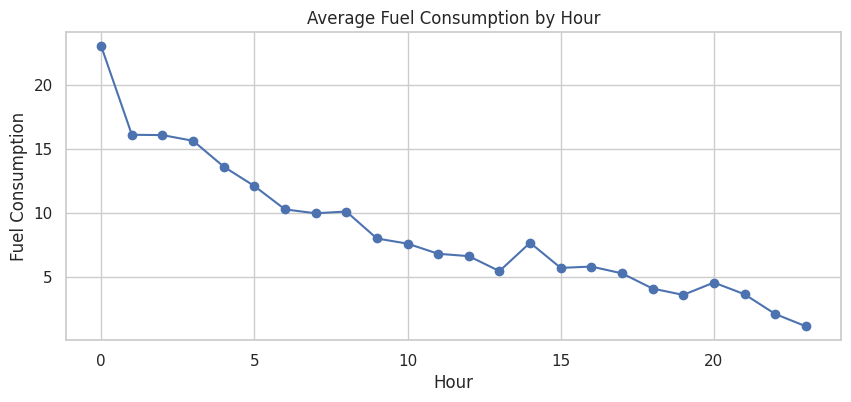

In [52]:
hourly_fuel = new_df.groupby('hour')['fuel_consumption'].mean()

plt.figure(figsize=(10,4))
plt.plot(hourly_fuel.index, hourly_fuel.values, marker='o')
plt.title('Average Fuel Consumption by Hour')
plt.xlabel('Hour')
plt.ylabel('Fuel Consumption')
plt.grid(True)
plt.show()


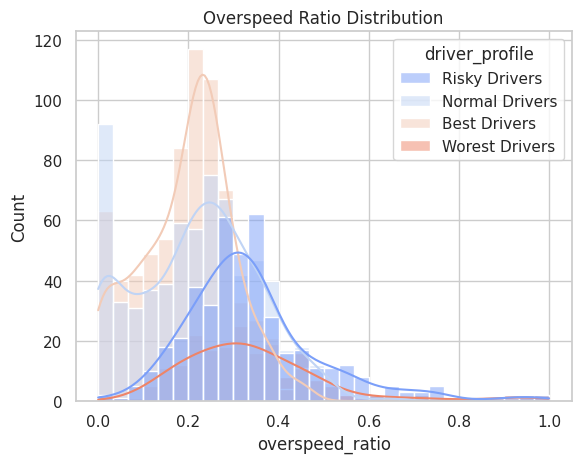

In [53]:
sns.histplot(
    data=driver_df,
    x='overspeed_ratio',
    hue='driver_profile',
    bins=30,
    kde=True,
    palette='coolwarm'
)
plt.title('Overspeed Ratio Distribution')
plt.show()


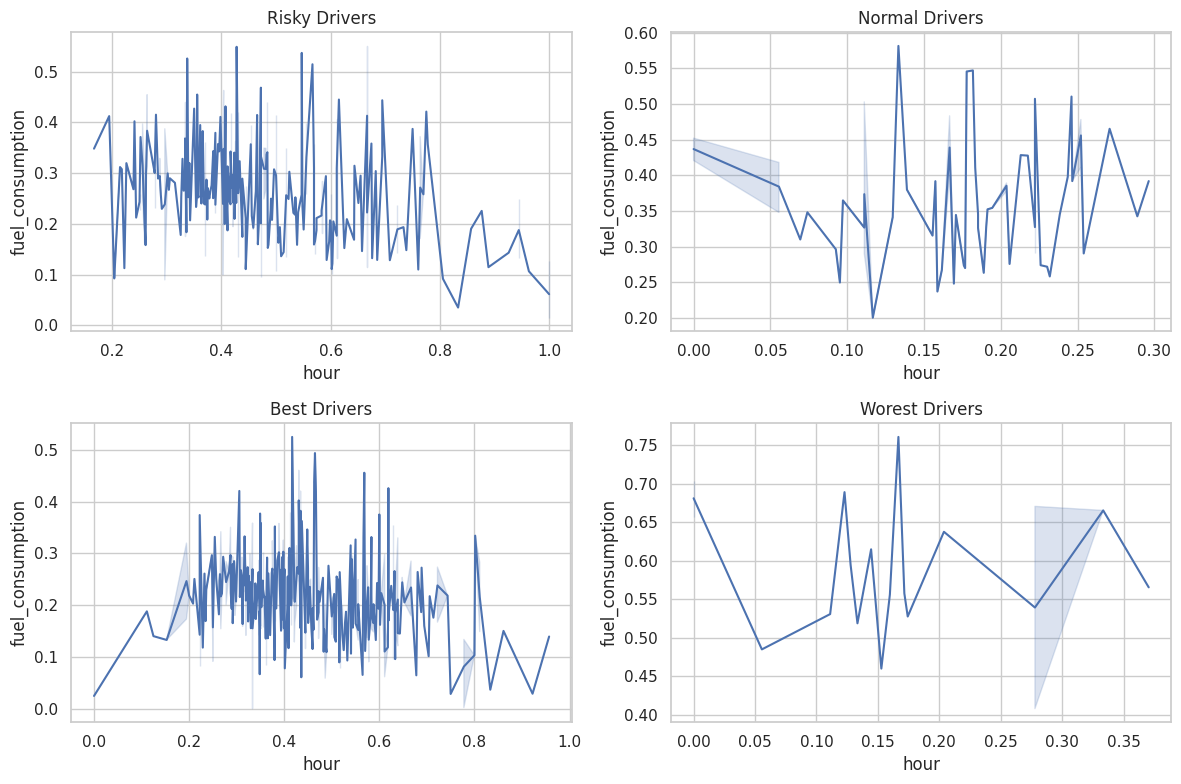

In [54]:
profiles = driver_df['driver_profile'].unique()

plt.figure(figsize=(12,8))

for i, profile in enumerate(profiles, 1):
    plt.subplot(2, 2, i)
    subset = driver_df[driver_df['driver_profile'] == profile]
    sns.lineplot(
        data=subset,
        x='hour',
        y='fuel_consumption'
    )
    plt.title(profile)

plt.tight_layout()
plt.show()

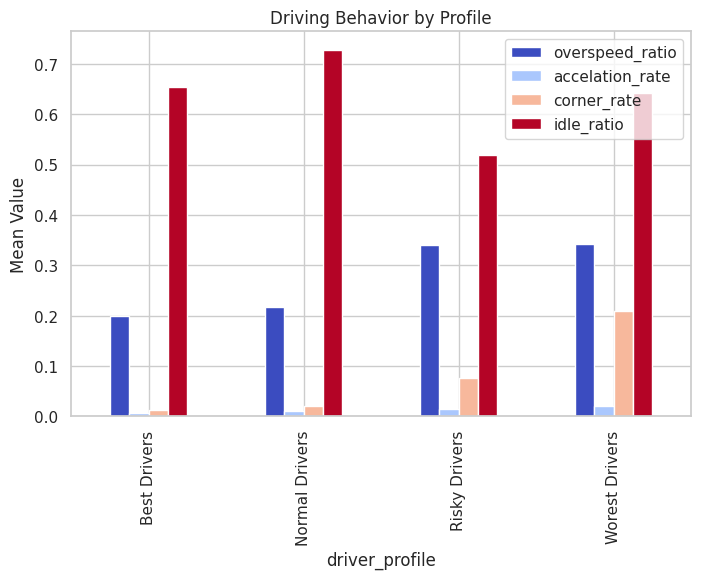

In [55]:
profile_mean = driver_df.groupby('driver_profile')[
    ['overspeed_ratio','accelation_rate','corner_rate','idle_ratio']
].mean()

profile_mean.plot(
    kind='bar',
    figsize=(8,5),
    colormap='coolwarm'
)

plt.title('Driving Behavior by Profile')
plt.ylabel('Mean Value')
plt.show()
